In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from lofo import LOFOImportance, FLOFOImportance, Dataset, plot_importance

In [2]:
from data.test_data import generate_test_data, generate_unstructured_test_data

df = generate_test_data(1000)
df.head()

,A,B,C,D,target,binary_target
0,0.548814,0.592880,0.811518,0.413962,1.471477,1
1,0.715189,0.010064,0.476084,0.629618,0.583727,0
2,0.602763,0.475826,0.523156,0.778584,1.448437,1
3,0.544883,0.708770,0.250521,0.851558,1.951483,1
4,0.423655,0.043975,0.605043,0.816413,0.444471,0


In [3]:
lr = LinearRegression()
lr.fit(df[["A", "B", "C", "D"]], df["target"])

fi = FLOFOImportance(lr, df, ["A", "B", "C", "D"], 'target', scoring="neg_mean_absolute_error")

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
1,B,0.540447,0.017032
3,D,0.091187,0.003451
0,A,0.087466,0.001888
2,C,0.000095,0.000055


In [4]:
from sklearn.metrics import make_scorer, mean_absolute_error

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv = KFold(n_splits=4, shuffle=True, random_state=0)

dataset = Dataset(df=df, target="target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, scoring=scorer, model=LinearRegression(), cv=cv)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
1,B,0.445256,0.026244
3,D,0.053289,0.006535
0,A,0.050934,0.004749
2,C,0.000049,0.000028


In [5]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)

dataset = Dataset(df=df, target="binary_target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, scoring='accuracy', model=rf, cv=cv)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
1,B,0.421,0.015588
0,A,0.043,0.019875
3,D,0.038,0.007211
2,C,0.006,0.009165


In [6]:
df = generate_unstructured_test_data(10000)

dataset = Dataset(df=df, target="binary_target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, 'roc_auc')

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
1,B,0.190080,0.004669
0,A,0.004766,0.004523
3,D,0.003300,0.001643
2,C,0.000616,0.006351


In [7]:
dataset = Dataset(df=df, target="target", features=["A", "B", "C", "D", "E"])
fi = LOFOImportance(dataset, scorer, n_jobs=-1)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
4,E,0.504203,0.002371
1,B,0.269073,0.005176
0,A,0.268072,0.004828
3,D,0.029866,0.001460
2,C,-0.000996,0.000389


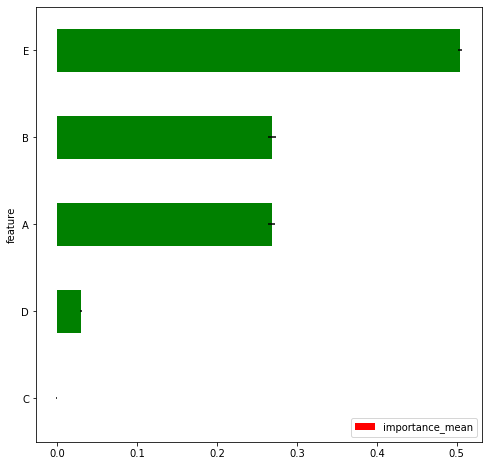

In [8]:
%matplotlib inline
plot_importance(importances)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from lightgbm import LGBMClassifier

df = generate_test_data(1000, text=True)
features = ["A", "B", "C", "D"]

cv = CountVectorizer(ngram_range=(3, 3), analyzer="char")
feature_groups = dict()
feature_groups["names"] = cv.fit_transform(df["T"])
feature_groups["interactions"] = df[["A", "B"]].values*df[["C", "D"]].values

dataset = Dataset(df=df, target="binary_target", features=features, feature_groups=feature_groups)

lgbm = LGBMClassifier(random_state=0, n_jobs=1)

lofo = LOFOImportance(dataset, model=lgbm, cv=4, scoring='roc_auc', n_jobs=4)

importances = lofo.get_importance()
importances

/home/ahmet/ing/lofo-importance/lofo/lofo_importance.py:28: UserWarning: Warning: If your model is multithreaded, please initialise the numberof jobs of LOFO to be equal to 1, otherwise you may experience performance issues.
  warnings.warn(warning_str)


,feature,importance_mean,importance_std
5,names,0.220283,0.011425
3,B,0.005008,0.002075
1,A,0.000773,0.000514
2,D,0.000074,0.000368
0,C,-0.000110,0.000482
4,interactions,-0.000147,0.000751
